### **Apache Airflow: Orquestração um pipeline de dados**

O Airflow é um sistema de gerenciamento de fluxo de trabalho open source, possibilitando a criação e monitorando datapipelines. Essa ferramenta foi criada em 2014 pelo Airbnb, mas desde o início de 2019, o Airflow se tornou um projeto de alto nível da Apache Software Foundation. Um pipeline de dados, ou datapipeline, é uma série de etapas de processamento de dados. Sendo que, cada etapa fornece uma saída que é a entrada para a próxima etapa. Isso vai acontecendo até que o pipeline seja concluído. Além disso, também podem existir etapas independentes a serem executadas em paralelo.

A maioria dos pipelines possuem três elementos principais: a origem, uma ou mais etapas de processamento e o destino. Mas os pipelines de dados podem ser arquitetados de várias maneiras diferentes e tudo vai depender do caso de uso.

O Airflow é todo escrito em Python e possui características como: é **dinâmico**, isso porque todas as pipelines de dados são definidos em python. Além disso, é uma ferramenta **extensível**, porque permite se conectar a várias outras ferramentas do ecossistemas de dados. Ele é também **escalável** e uma vez que existe poder computacional suficiente é possível orquestrar inúmeras quantidades de pipelines de dados, independente da complexidade. Ainda, essa ferramenta é considerada **elegante** pois permite desenvolver uma pipeline de dados de forma objetiva e direta, tendo ainda uma **interface web** útil e fácil de utilizar.

- Casos de uso comuns do Airflow:

1. Pipelines ETL/ELT;
2. Treinamento de modelos de Machine Learning;
3. Geração de relatório automatizada;
4. Backups automáticos.

**Principais conceitos do Airflow:**

- **DAG**: fluxo de trabalho definido em python;
- **Task**: unidade mais básica do DAG e é utilizada para implementar uma lógica no pipeline de dados. É possível dizer que uma DAG é um conjunto de tasks.
- **DAG Run**: execução de um DAG no tempo. Inclui algumas informações sobre a execução do DAG como horários, tempo de execução de cada uma das tarefas do DAG e outras infos. É a instância de um DAG no tempo.
- **Task Instance**: é a execução de uma tarefa em um ponto específico do tempo.
- **Operator**: são os blocos de construção de um DAG. Eles contém as lógicas de como os dados são processados em um datapipeline. Cada task é definida pela instanciação de um operator (a lógica encapsulada).

**A arquitetura do Airflow:**

- **Web Server**: é um servidor feito em Flask, um framework web Pyhton, que serve para apresentar a interface de usuário do Airflow.
- **Scheduler**: ou agendador, é responsável pelo agendamento da execução das tarefas dos DAGs, então ele determina quais tarefas serão realizadas, onde serão executadas e em qual ordem isso acontecerá. 
- **Banco de Dados**: serve para armazenar todos os metadados referentes aos DAGs. Ele registra o horário em que as tarefas foram executadas, quanto tempo cada task levou para ser realizada e o estado de cada uma (sucesso ou falha), e outras informações relacionadas.
- **Executor**: é o mecanismo de execução das tarefas. Ele é responsável por descobrir quais recursos serão necessários para executar essas tasks.

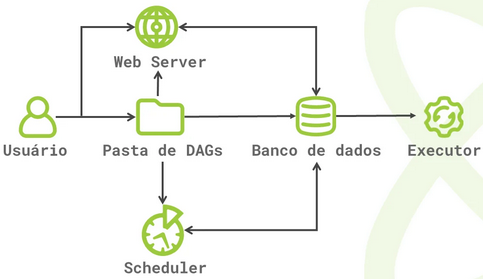


#### **Extração de Dados com Airflow**

> Pipeline de dados com Airflow: fonte de dados, conexões, tarefa de extração e orquestração.

![alt text](image.png)

**Hook**: No Airflow o **Hook** é uma abstração para interagir com serviços externos e sistemas de armazenamento. Hooks são classes em Python que encapsulam a lógica de comunicação com esses serviços e oferecem métodos convenientes para executar operações específicas, como ler e escrever dados, autenticar, enviar solicitações HTTP, entre outras. Os hooks são projetados para serem reutilizáveis e podem ser usados diretamente nos **operadores** do Airflow, que são as unidades de execução das tarefas. Cada hook é geralmente associado a um serviço ou protocolo específico.

**Operadores** eterminam o que será executado em uma tarefa, descrevendo um único passo. Um operador possui três características: **idempotência** (independentemente de quantas vezes uma tarefa for executada com os mesmos parâmetros, o resultado final deve ser sempre o mesmo), **isolamento** (a tarefa não compartilha recursos com outras tarefas de qualquer outro operador) e **atomicidade** (a tarefa é um processo indivisível e bem determinado). Operadores geralmente executam de forma independente, e o DAG vai garantir que operadores sejam executados na ordem correta. Quando um operador é instanciado, ele se torna parte de um nó do no DAG. Todos os operadores derivam do operador base chamado BaseOperator, e herdam vários atributos e métodos. Existem 3 tipos de operadores: operadores que fazem/ou chamam uma ação em outro sistema; operadores usados para mover dados de um sistema para outro; e operadores usados como sensores (método poke e poke_interval).

A **estrutura do Data Lake é importante para manter a organização dos dados extraídos**. Seria possível estruturar os dados de maneira convencional, utilizando um banco de dados e tabelas, porém seria um pouco complexa uma vez que seria necessário converter os dados em JSON para tabelar. Isso também limitaria o carregamento dos dados no banco. A grande vantagem do data lake é justamente poder armazenar diferentes fontes de dados (como APIs, banco de dados e logs) de forma mais fluida (permite dados estruturados e não estruturados), o que requer um cuidado para não transformá-lo em um data swamp. A principal desvantagem se dá no  grande local de armazenamento e processamento necessário.

No caso desse projeto, foi criada uma pasta com os resultados obtidos a partir da extração dos tweets usando query de interesse, assim como a data de extração.

É pelo **DAG que será possível automatizar todo o processo**. DAG é uma abreviação para “Directed Acyclic Graphs” - Grafos Acíclicos Dirigidos, onde para cada termo tem o significado: grafos - ferramenta matemática na qual há nós e arestas responsáveis por conectar esses nós; direcionado - indica que o fluxo de trabalho se dá apenas em uma direção; e acíclico que significa que a execução não entrará em um laço de repetição. Então, eventualmente, acontece um nó final que não estará conectado com o nó inicial.

A grande ideia do Airflow é dividir um trabalho grande, com uma ou mais etapas, em “tarefas” individuais, chamadas de tasks que juntas formam um DAG. Cada task é responsável por implementar determinada lógica no pipeline. Assim, um DAG é basicamente um conjunto de tarefas. Sendo cada tarefa a unidade mais básica de um DAG.

### **TaskFlow** 

O TaskFlow é uma forma mais simples e prática de criar DAGs usando código Python. A API TaskFlow foi criada a partir da versão 2.0 do Airflow e oferece uma maneira de declarar explicitamente mensagens passadas entre tarefas em um DAG. Além disso, ela também declara automaticamente as dependências entre as tarefas.

As tarefas, por padrão, são totalmente isoladas uma das outras e não podem compartilhar dados. Para conseguir compartilhar informações entre tarefas sempre é necessário utilizar o mecanismo XCom. O TaskFlow simplifica como um DAG e suas tarefas são declarados. Ele faz isso encapsulando grande parte do código que é utilizado para a criação das tarefas, em decoradores. Utilizando esses decoradores o código fica mais simples e mais fácil de entender.

**Decoradores**

Um decorator serve basicamente para adicionar a uma determinada função algumas funcionalidades que ele possui implementadas por baixo dos panos. Então, ele consegue adicionar essas funcionalidades sem ter que mudar o código da função em si.

O decorador de tarefas (@task) permite que os usuários convertam qualquer função Python em uma instância de tarefa utilizando o PythonOperator por baixo dos panos. Já o decorador DAG (@dag) permite aos usuários instanciar o DAG sem utilizar um gerenciador de contexto.